In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [287]:
path = "C:\\Users\\issak\\Documents\\M1\\Analyse financière\\Untitled Folder\\"

# Importing daily data from CAC SMALL index

df = pd.read_csv(path + "CAC_SMALL_historical_price.csv", sep=";")

# First visualisation of the dataframe 

df.head()

,Date,Open,High,Low,Last,Close,Number of Shares,Number of Trades,Turnover
0,16/01/2025,10578.85,10578.85,10504.25,10533.67,10533.67,'0,'0,'23158554
1,15/01/2025,10506.05,10563.56,10452.17,10540.33,10540.33,'0,'0,'24900903
2,14/01/2025,10595.11,10621.42,10472.68,10472.68,10472.68,'0,'0,'28020637
3,13/01/2025,10692.43,10715.70,10559.57,10559.57,10559.57,'0,'0,'25683610
4,10/01/2025,10808.90,10808.90,10689.24,10696.30,10696.30,'0,'0,'24713996


In [295]:
# Creating a new data frame whose only columns are 'Date' and 'Close'.

df = df[['Date','Close']]
# visualisation of the dataframe 

df.head()

,Date,Close
0,16/01/2025,10533.67
1,15/01/2025,10540.33
2,14/01/2025,10472.68
3,13/01/2025,10559.57
4,10/01/2025,10696.30


In [308]:
# Sorting the data by date from the oldest to the newest

df['Date'] =  pd.to_datetime(df['Date'], dayfirst=True,errors='coerce')
df = df.sort_values(by=['Date'],axis=0, ascending=True)
#df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')
df = df.reset_index(drop=True).copy()

# visualisation of the dataframe 

df.head(10)

,Date,Close
0,2023-01-17,12729.14
1,2023-01-18,12745.57
2,2023-01-19,12528.17
3,2023-01-20,12548.44
4,2023-01-23,12634.24
5,2023-01-24,12609.04
6,2023-01-25,12553.88
7,2023-01-26,12597.22
8,2023-01-27,12641.26
9,2023-01-30,12525.72


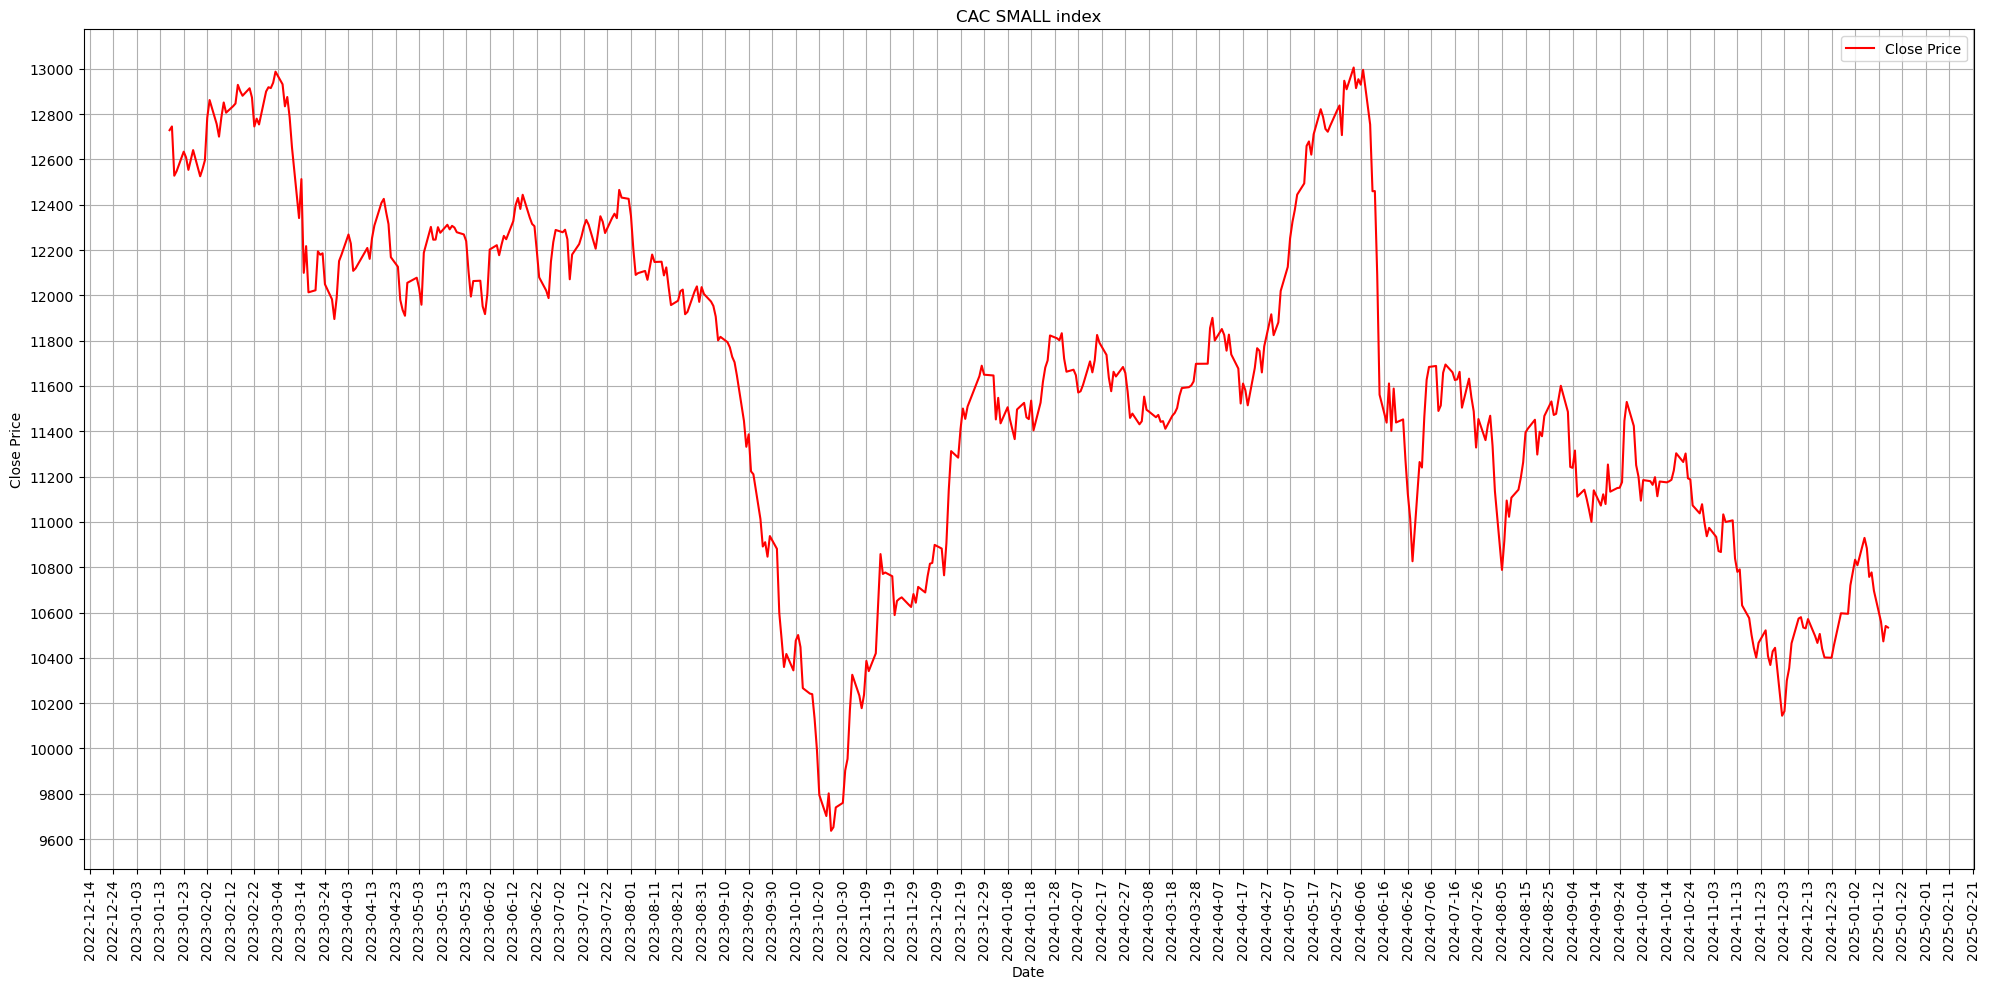

In [298]:
# plotting the data

plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['Close'] , label='Close Price', color='red')
plt.title("CAC SMALL index")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=100))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.tight_layout()
plt.show()

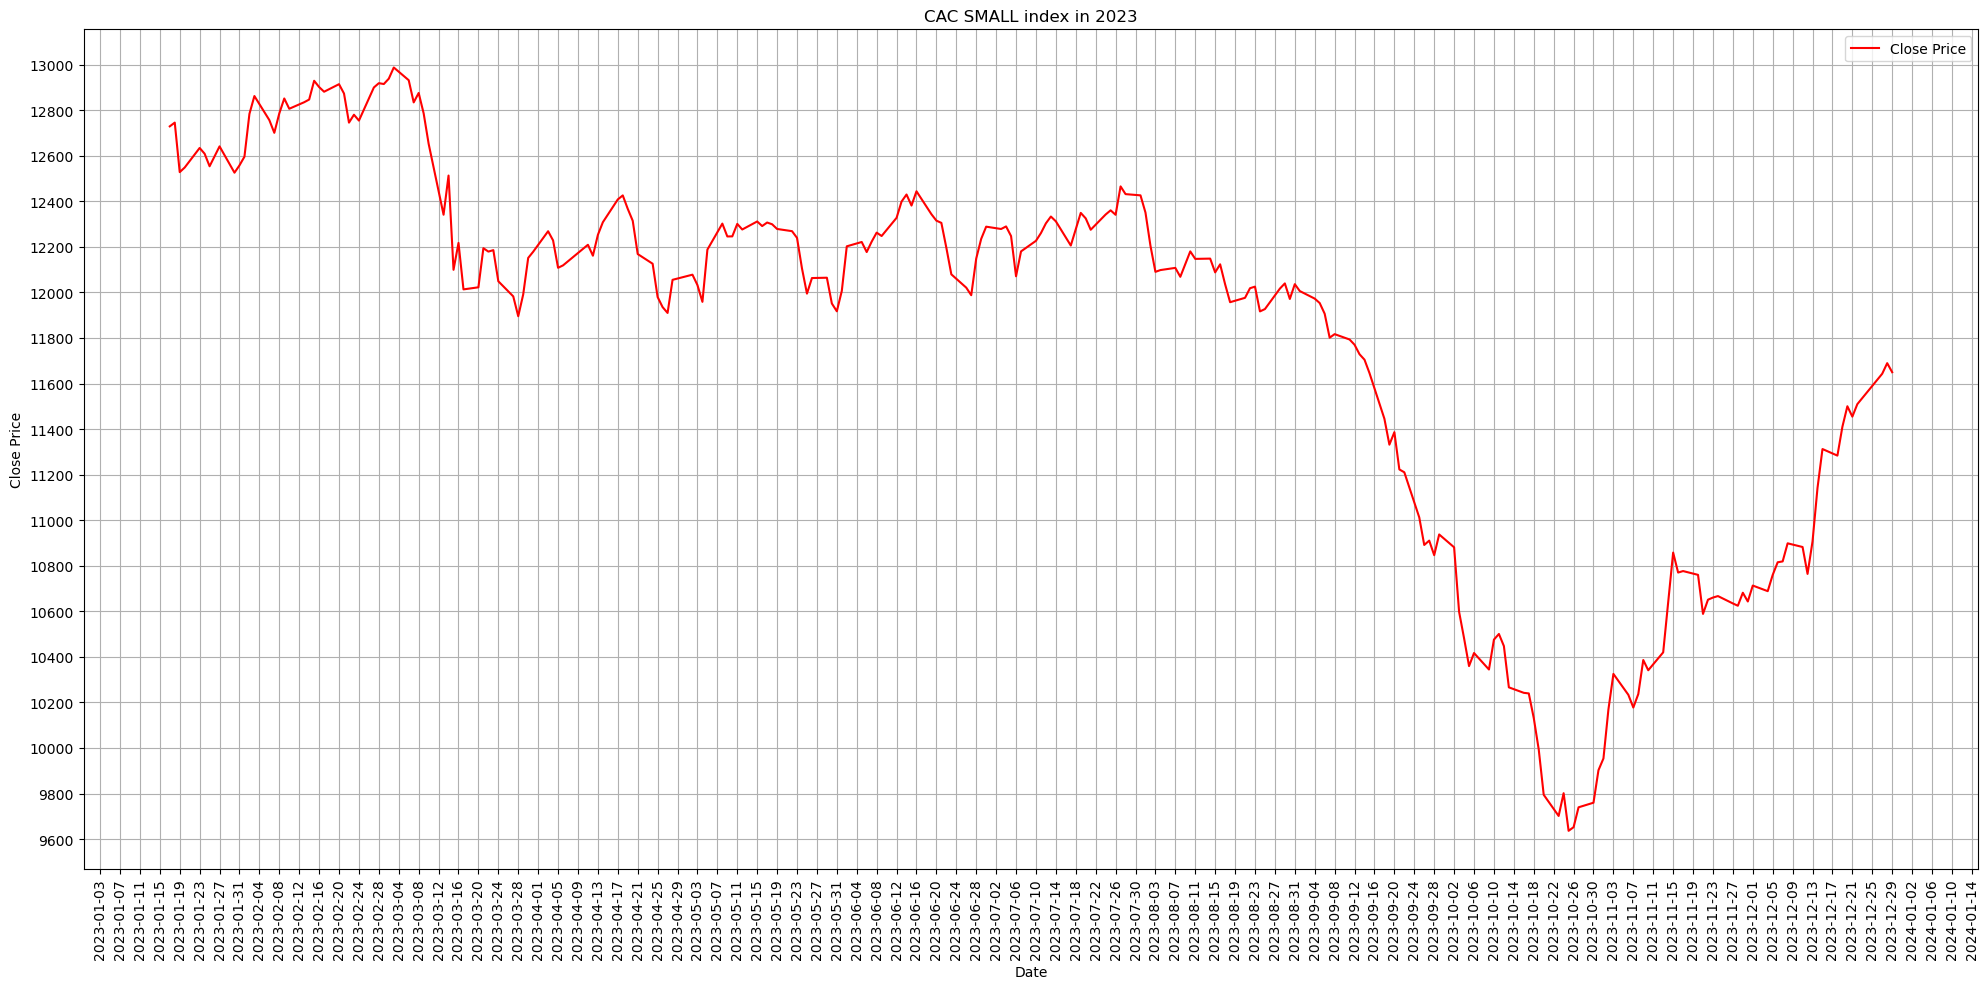

In [300]:
# Creating a new dataframe with only the close price of the CAC SMALL index for the year 2023

df_2023 = df[df['Date'].dt.year == 2023]
df_2023.head(10) 

# plotting the data

plt.figure(figsize=(20,10))
plt.plot(df_2023['Date'], df_2023['Close'] , label='Close Price', color='red')
plt.title("CAC SMALL index in 2023")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=100))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.tight_layout()
plt.show()

In [299]:
# Computing the annual return for the CAC SMALL index in 2023

df_2023.shape

return_2023 = (df_2023['Close'][243]/df_2023['Close'][0])*100

if return_2023 > 0 :
    print('The annual return of the CAC SMALL in 2023 is : +', return_2023)
else :
    print('The annual return of the CAC SMALL in 2023 is :', return_2023)
        

The annual return of the CAC SMALL in 2023 is : + 91.52016554142699


In [301]:
# Computing the daily return for the CAC SMALL index in 2023
df_2023 = df[df['Date'].dt.year == 2023].copy()
df_2023['CAC_SMALL_return'] = np.log(df_2023['Close']/df_2023['Close'].shift(1))*100
df_2023.head(10)

,Date,Close,CAC_SMALL_return
0,2023-01-17,12729.14,NaN
1,2023-01-18,12745.57,0.128991
2,2023-01-19,12528.17,-1.720405
3,2023-01-20,12548.44,0.161665
4,2023-01-23,12634.24,0.681423
5,2023-01-24,12609.04,-0.199657
6,2023-01-25,12553.88,-0.438424
7,2023-01-26,12597.22,0.344637
8,2023-01-27,12641.26,0.348991
9,2023-01-30,12525.72,-0.918194


In [302]:
# Computing the mean and the standard deviation for the CAC SMALL index in 2023

df_2023[['Close']].describe()

,Close
count,244.000000
mean,11803.273402
std,845.505891
min,9636.340000
25%,11268.425000
50%,12098.780000
75%,12314.750000
max,12987.540000


In [303]:
# Computing the variance, the skewness and the kurtosis of the closing price for the CAC SMALL index in 2023.

var_2023 = df_2023['Close'].var()
skew_2023 = df_2023['Close'].skew()
kurt_2023 = df_2023['Close'].kurt()
print('The variance for the close price of the CAC SMALL index in 2023 is', var_2023)
print('The skewness for the close price of the CAC SMALL index in 2023 is', skew_2023)
print('The kurtosis for the close price of the CAC SMALL index in 2023 is', kurt_2023)

The variance for the close price of the CAC SMALL index in 2023 is 714880.2116151302
The skewness for the close price of the CAC SMALL index in 2023 is -0.9075989593875288
The kurtosis for the close price of the CAC SMALL index in 2023 is -0.2394059251016376


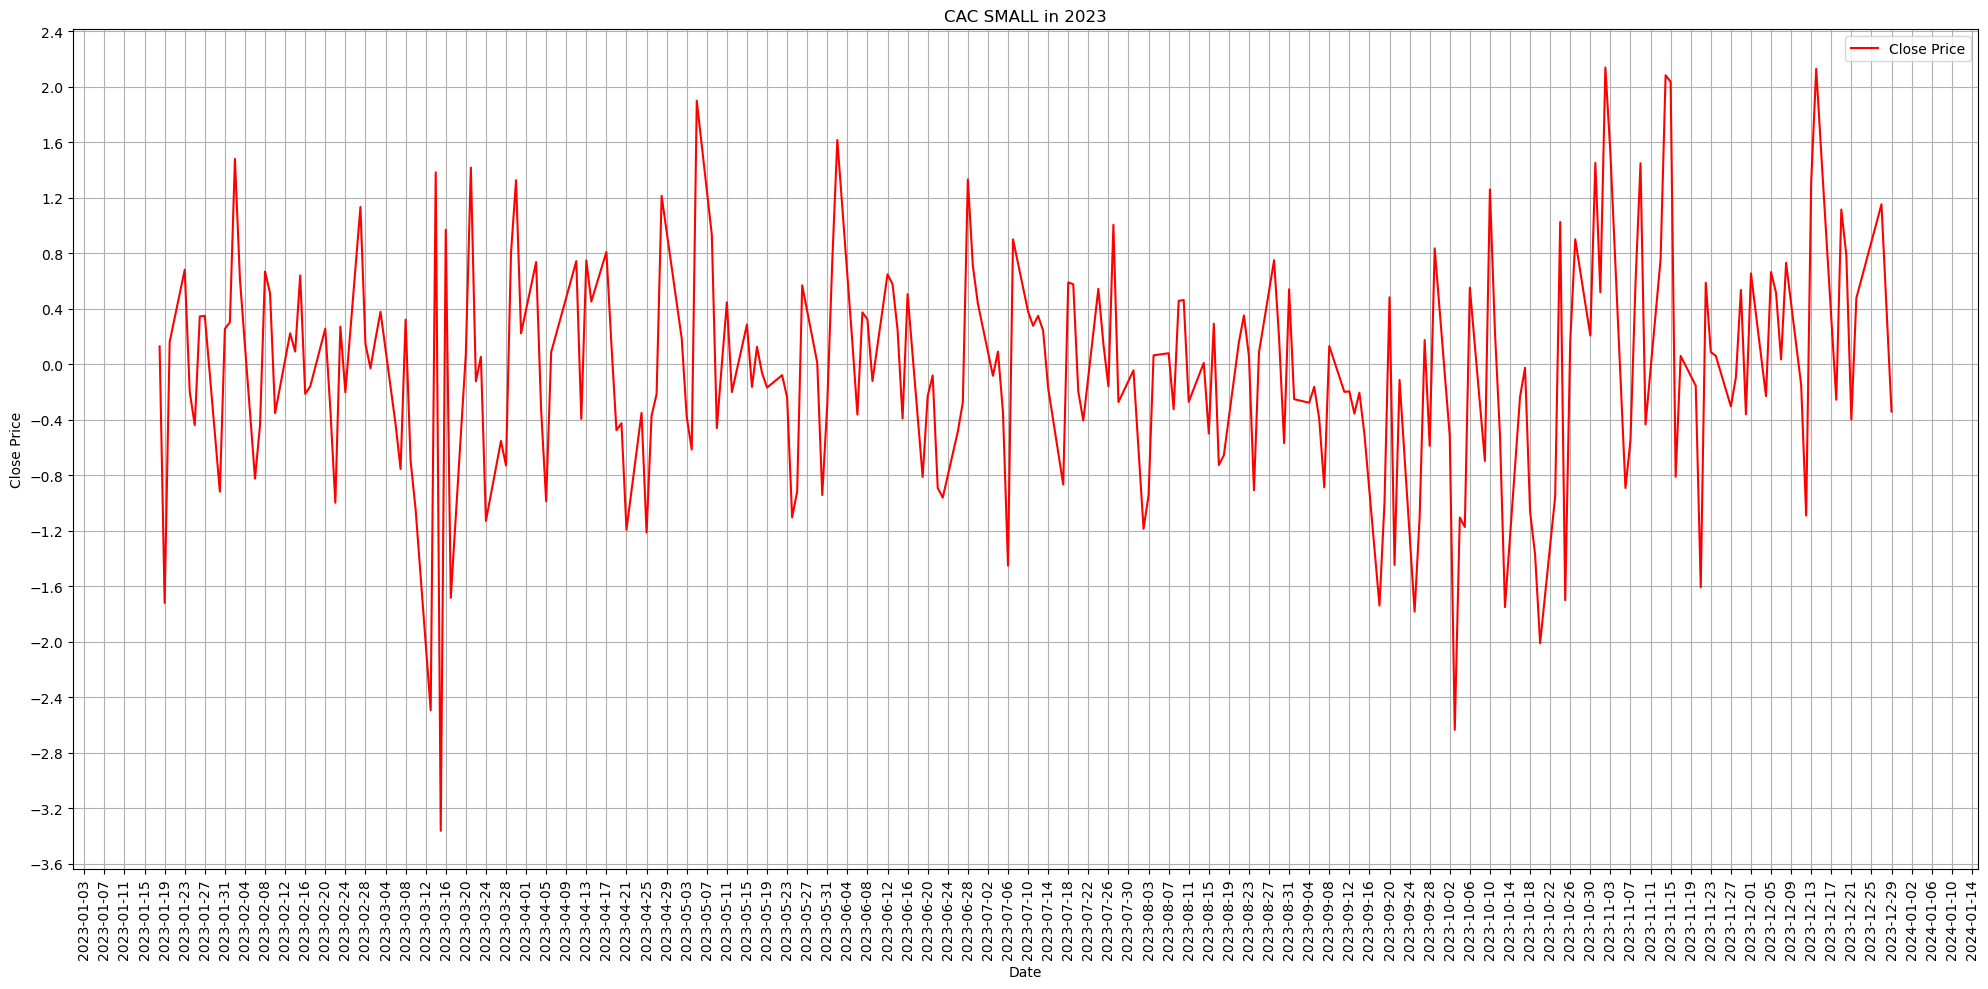

In [307]:
# plotting the data of the return for the CAC SMALL index in the 2023

plt.figure(figsize=(20,10))
plt.plot(df_2023['Date'], df_2023['CAC_SMALL_return'] , label='Close Price', color='red')
plt.title("CAC SMALL in 2023")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=100))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.tight_layout()
plt.show()